In [15]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(grid)
theme_set(theme_bw())
options(repr.plot.width=10, repr.plot.height=5)

In [16]:
# Input time (PST), electoral votes, and fivethirtyeight.com. 
df = read.table('electoral-votes.tsv', sep='\t')
colnames(df) = c("State", "Votes", "Time")
rep_states = c('Wyoming', 'West Virginia', 'Oklahoma', 'North Dakota', 'Alabama', 'Arkansas', 'Idaho', 'Kentucky', 'Nebraska', 'Louisiana', 'South Dakota', 'Montana', 'Mississippi', 'Kansas', 'Tennessee', 'Indiana', 'Utah', 'Missouri', 'Texas', 'Alaska', 'South Carolina', 'Georgia', 'Iowa', 'Arizona', 'Ohio') 
dem_states = c('Florida', 'North Carolina', 'Nevada', 'New Hampshire', 'Pennsylvania', 'Colorado', 'Michigan', 'Wisconsin', 'Virginia', 'New Mexico', 'Minnesota', 'Maine', 'Oregon', 'New Jersey', 'Delaware', 'Connecticut', 'Illinois', 'Washington', 'Rhode Island', 'New York', 'California', 'Massachusetts', 'Hawaii', 'Maryland', 'Vermont', 'D.C.')
df$Party = ifelse(df$State %in% rep_states, "Republican", "Democratic")
df = df[order(strptime(df$Time, '%H:%M')), ]
head(df)

,State,Votes,Time,Party
11,Georgia,16,4:00,Republican
15,Indiana,11,4:00,Republican
18,Kentucky,8,4:00,Republican
41,South Carolina,9,4:00,Republican
46,Vermont,3,4:00,Democratic
47,Virginia,13,4:00,Democratic


In [17]:
# Get cumulative votes by state
df = df %>% mutate(Democratic=cumsum(replace(Votes, Party == 'Republican', 0))) %>%
            mutate(Republican=cumsum(replace(Votes, Party == 'Democratic', 0)))
df$State = factor(df$State, levels=df$State)
df = melt(df, id.vars=c("State", "Time"), measure.vars=c("Democratic", "Republican"))
colnames(df) = c("State", "Time", "Party", "Votes")
df$Candidate = factor(ifelse(df$Party == "Republican", "Trump", "Clinton"), levels=c("Trump", "Clinton"))

In [18]:
df

,State,Time,Party,Votes,Candidate
1,Georgia,4:00,Democratic,0,Clinton
2,Indiana,4:00,Democratic,0,Clinton
3,Kentucky,4:00,Democratic,0,Clinton
4,South Carolina,4:00,Democratic,0,Clinton
5,Vermont,4:00,Democratic,3,Clinton
6,Virginia,4:00,Democratic,16,Clinton
7,North Carolina,4:30,Democratic,31,Clinton
8,Ohio,4:30,Democratic,31,Clinton
9,West Virginia,4:30,Democratic,31,Clinton
10,Alabama,5:00,Democratic,31,Clinton


mapping: yintercept = yintercept 
geom_hline: linetype = 2, alpha = 0.6 
stat_hline: yintercept = NULL 
position_identity: (width = NULL, height = NULL)

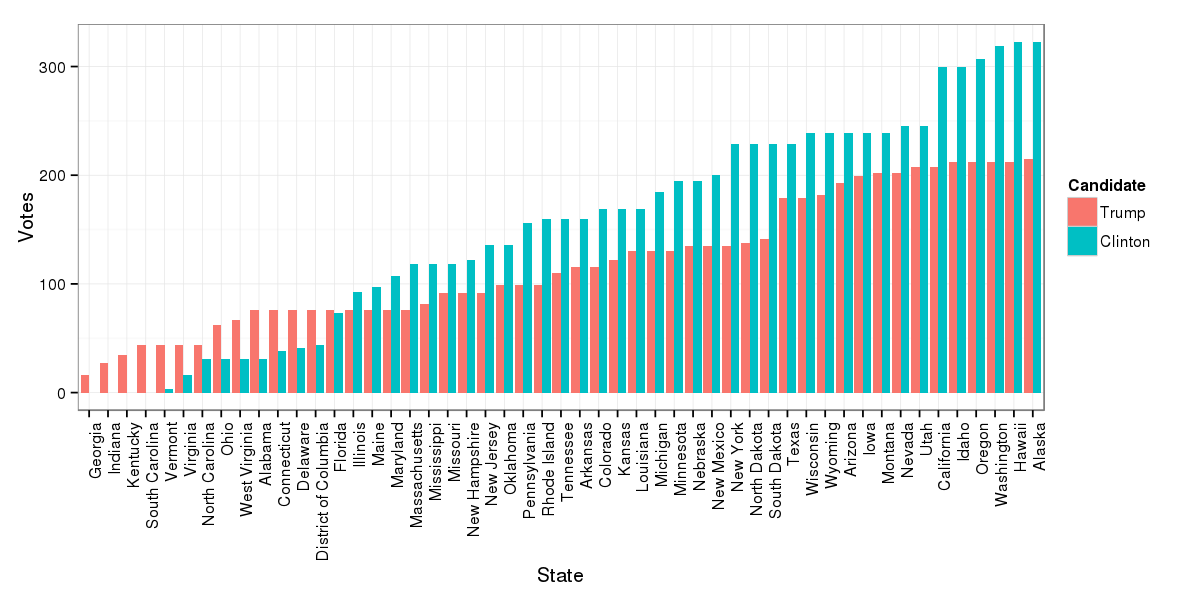

In [19]:
ggplot(df) + geom_bar(aes(x=State, y=Votes, fill=Candidate), position='dodge', stat='identity') +
  theme(axis.text.x = element_text(angle=90, hjust=1))
  geom_hline(y=270, linetype=2, alpha=0.6)

Looks great! We also want to annotate the times, so we know when to check in for the election results.

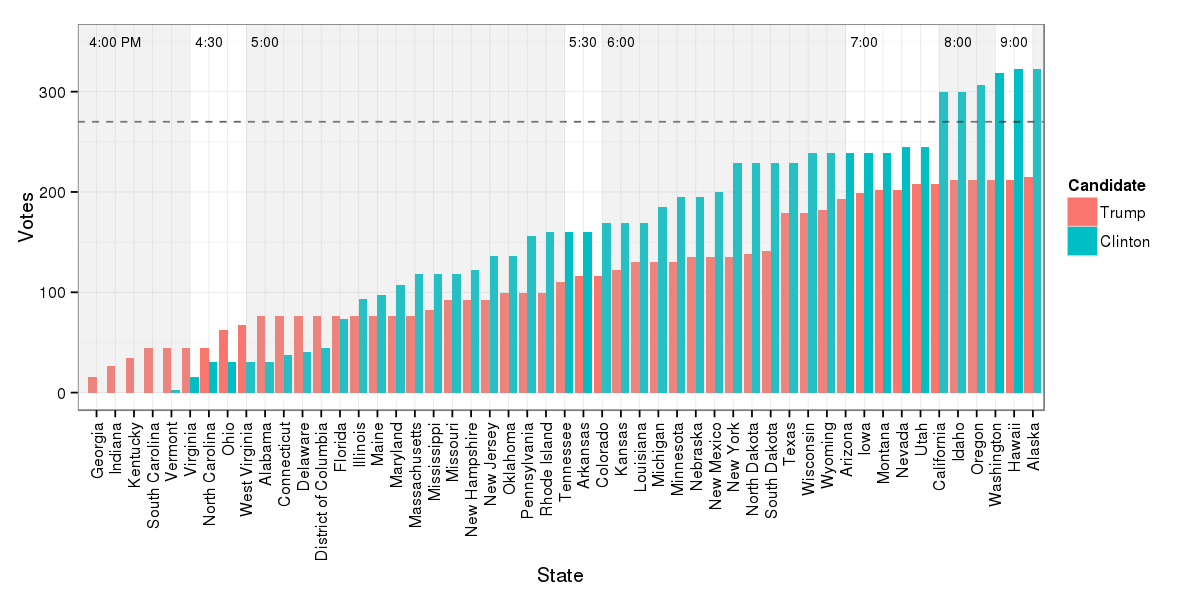

In [21]:
ggplot(df) + geom_bar(aes(x=State, y=Votes, fill=Candidate), position='dodge', stat='identity') +
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)) +
  geom_hline(y=270, linetype=2, alpha=0.6) +
  annotate("rect", xmin=0, xmax="Virginia", ymin=0, ymax=Inf, alpha=0.2, fill="gray") +
  annotate("rect", xmin="West Virginia", xmax="Tennessee", ymin=0, ymax=Inf, alpha=0.2, fill="gray") +
  annotate("rect", xmin="Colorado", xmax="Arizona", ymin=0, ymax=Inf, alpha=0.2, fill="gray") +
  annotate("rect", xmin="California", xmax="Washington", ymin=0, ymax=Inf, alpha=0.2, fill="gray") +
  annotate("rect", xmin="Alaska", xmax=Inf, ymin=0, ymax=Inf, alpha=0.2, fill="gray") +
  annotate("text", x="Indiana", y=350, label="4:00 PM", size=3) + 
  annotate("text", x="North Carolina", y=350, label="4:30", size=3) +
  annotate("text", x="Alabama", y=350, label="5:00", size=3) +
  annotate("text", x="Arkansas", y=350, label="5:30", size=3) +
  annotate("text", x="Kansas", y=350, label="6:00", size=3) +
  annotate("text", x="Iowa", y=350, label="7:00", size=3) +
  annotate("text", x="Idaho", y=350, label="8:00", size=3) +
  annotate("text", x="Hawaii", y=350, label="9:00", size=3)

TODO next election: model Bernoulli distributions $X_i$, where $i \in$ {Georgia, Indiana, ...} based on fivethirtyeight.com odds. Then, calculate joint distributions to predict when the election results are finished counting.